## Step1. 데이터셋 준비하기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import os
os.environ['KAGGLE_USERNAME'] = 'woojunghan'
os.environ['KAGGLE_KEY'] = '687be50cf96b262fbdaf1067a6fe3acb'

In [6]:
!kaggle datasets download -d hugomathien/soccer
!unzip '*.zip'

soccer.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  soccer.zip
replace database.sqlite? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: database.sqlite         


## sqlite3 와 Pandas로 sqlite 데이터 베이스 읽기

In [7]:
import sqlite3

In [8]:
conn = sqlite3.connect('database.sqlite')
#데이터 베이스에서 Country라는 테이블 내에서 모든 컬럼 모두 가져와라
df_country = pd.read_sql_query('SELECT * from Country', conn) 
df_league = pd.read_sql_query('SELECT * from League', conn)
df_match = pd.read_sql_query('SELECT * from Match', conn)
df_player = pd.read_sql_query('SELECT * from Player', conn)
df_player_att = pd.read_sql_query('SELECT * from Player_Attributes', conn)
df_team = pd.read_sql_query('SELECT * from Team', conn)
df_team_att = pd.read_sql_query('SELECT * from Team_Attributes', conn)

In [10]:
df_team_att.head()

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,Organised,60,Normal,65,Normal,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,Organised,54,Normal,63,Normal,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,Organised,54,Normal,63,Normal,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,Organised,70,Risky,70,Lots,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,Organised,53,Normal,48,Normal,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


## Step2. EDA 및 데이터 기초 통계 분석

In [11]:
df_country.head()

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy


In [12]:
df_league.head()

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A


In [13]:
df_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      11 non-null     int64 
 1   name    11 non-null     object
dtypes: int64(1), object(1)
memory usage: 304.0+ bytes


In [14]:
df_league['id'].unique()

array([    1,  1729,  4769,  7809, 10257, 13274, 15722, 17642, 19694,
       21518, 24558])

In [15]:
df_league['country_id'].unique()

array([    1,  1729,  4769,  7809, 10257, 13274, 15722, 17642, 19694,
       21518, 24558])

In [16]:
df_match.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,...,away_player_10,away_player_11,goal,shoton,shotoff,foulcommit,card,cross,corner,possession,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,None,None,None,None,None,None,None,None,1.73,3.40,5.00,1.75,3.35,4.20,1.85,3.2,3.5,1.80,3.3,3.75,NaN,NaN,NaN,1.70,3.30,4.33,1.90,3.3,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,None,None,None,None,None,None,None,None,1.95,3.20,3.60,1.80,3.30,3.95,1.90,3.2,3.5,1.90,3.2,3.50,NaN,NaN,NaN,1.83,3.30,3.60,1.95,3.3,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,None,None,None,None,None,None,None,None,2.38,3.30,2.75,2.40,3.30,2.55,2.60,3.1,2.3,2.50,3.2,2.50,NaN,NaN,NaN,2.50,3.25,2.40,2.63,3.3,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,None,None,None,None,None,None,None,None,1.44,3.75,7.50,1.40,4.00,6.80,1.40,3.9,6.0,1.44,3.6,6.50,NaN,NaN,NaN,1.44,3.75,6.00,1.44,4.0,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,None,None,None,None,None,None,None,None,5.00,3.50,1.65,5.00,3.50,1.60,4.00,3.3,1.7,4.00,3.4,1.72,NaN,NaN,NaN,4.20,3.40,1.70,4.50,3.5,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


In [17]:
df_match.loc[df_match['league_id'] == '1729']

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,...,away_player_10,away_player_11,goal,shoton,shotoff,foulcommit,card,cross,corner,possession,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA


In [18]:
df_match['season'].unique()

array(['2008/2009', '2009/2010', '2010/2011', '2011/2012', '2012/2013',
       '2013/2014', '2014/2015', '2015/2016'], dtype=object)

In [19]:
df_match.drop(df_match.columns[-38:], axis = 1, inplace = True)

In [20]:
## 데이터 프레임간의 관계 파악하기
#### 데이터 프레임 간 중복되는 Column이 있는지 확인하고 유용한 Column식별하기
#### unique()로 값을 비교하거나, map()등을 활용하여 Column 관계를 파악하기
df_player_att['player_api_id'].value_counts()

210278    56
41269     56
42116     55
26472     54
179795    53
          ..
163254     2
266280     2
37366      2
238766     2
26568      2
Name: player_api_id, Length: 11060, dtype: int64

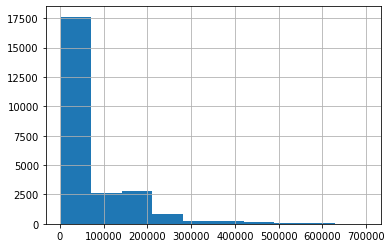

In [22]:
df_match['away_player_1'].hist()

In [23]:
df_match['away_player_1'].dropna().apply(int)) #Nan값들은 모두 날린 상태가 됨

144      67.888889
145      64.952381
146      68.000000
147      65.050000
148      69.428571
           ...    
25974    55.833333
25975    63.638889
25976    69.333333
25977    60.100000
25978    73.133333
Name: away_player_1, Length: 24745, dtype: float64

In [ ]:
df_match['away_player_1'].dropna().apply(int).map(df_player_att.groupby('player_api_id').mean()['overall_rating']) 

In [24]:
df_match['away_player_1'].dropna().apply(int).map(df_player_att.groupby('player_api_id').mean()['overall_rating']).isna().sum() #매핑이 모두 됐는지 확인
# .dropna() -> Nan 값들은 모두 날리고
# .apply(int) -> float 값들을 모두 int로 바꿈
# .map -> player_api_id로 묶은 평균 overall_rating을 적용
# 그말은 away_player_1의 값들이 모두 overall_rating 내에 다 있다는 뜻  | 모두 잘 matching 이 된 것을 알 수 있음 

0

In [25]:
df_team_att['team_api_id'].value_counts() # 한개에서 6개까지 중복되는것이 있다는 것을 알 수 있음

8191    6
8668    6
8661    6
8659    6
8658    6
       ..
8613    1
6631    1
6351    1
8614    1
9824    1
Name: team_api_id, Length: 288, dtype: int64

In [27]:
df_match['home_team_api_id'].map(df_team_att.groupby('team_api_id').mean()['buildUpPlaySpeed'])
# Team은 있지만 df_team_att에는 존재하지 않은 Team 들이 있음 -> 갯수를 세워보자면
# df_match['home_team_api_id'].map(df_team_att.groupby('team_api_id').mean()['buildUpPlaySpeed']).isna().sum()
# 178개임 (df_team_att에 누락되어있음)


0        56.333333
1        55.500000
2        53.666667
3        54.166667
4              NaN
           ...    
25974    47.600000
25975    53.000000
25976    49.500000
25977          NaN
25978    53.833333
Name: home_team_api_id, Length: 25979, dtype: float64

## 선수 특성 사이의 상관성 파악하기

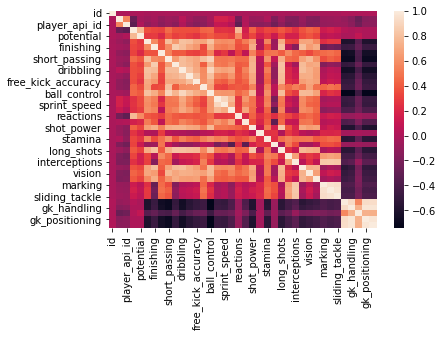

In [28]:
sns.heatmap(df_player_att.corr())

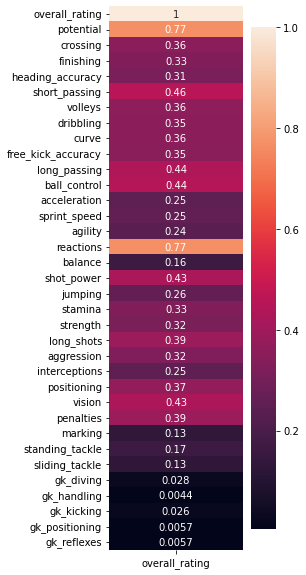

In [32]:
fig = plt.figure(figsize = (3, 10))
sns.heatmap(df_player_att.drop(['id', 'player_fifa_api_id', 'player_api_id'], axis = 1).corr()[['overall_rating']], annot = True)

In [34]:
# map() 메소드를 사용해서 데이터 프레임 통합하기
df_team_att.columns

Index(['id', 'team_fifa_api_id', 'team_api_id', 'date', 'buildUpPlaySpeed',
       'buildUpPlaySpeedClass', 'buildUpPlayDribblingClass',
       'buildUpPlayPassing', 'buildUpPlayPassingClass',
       'buildUpPlayPositioningClass', 'chanceCreationPassing',
       'chanceCreationPassingClass', 'chanceCreationCrossing',
       'chanceCreationCrossingClass', 'chanceCreationShooting',
       'chanceCreationShootingClass', 'chanceCreationPositioningClass',
       'defencePressure', 'defencePressureClass', 'defenceAggression',
       'defenceAggressionClass', 'defenceTeamWidth', 'defenceTeamWidthClass',
       'defenceDefenderLineClass'],
      dtype='object')

In [35]:
df_team_att.info()
#df_team_att.drop('buildUpPlayDribbling', axis = 1, inplace = True) # 많이 비어있어서

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   id                              1458 non-null   int64 
 1   team_fifa_api_id                1458 non-null   int64 
 2   team_api_id                     1458 non-null   int64 
 3   date                            1458 non-null   object
 4   buildUpPlaySpeed                1458 non-null   int64 
 5   buildUpPlaySpeedClass           1458 non-null   object
 6   buildUpPlayDribblingClass       1458 non-null   object
 7   buildUpPlayPassing              1458 non-null   int64 
 8   buildUpPlayPassingClass         1458 non-null   object
 9   buildUpPlayPositioningClass     1458 non-null   object
 10  chanceCreationPassing           1458 non-null   int64 
 11  chanceCreationPassingClass      1458 non-null   object
 12  chanceCreationCrossing          1458 non-null   

In [36]:
df_team_att.columns

Index(['id', 'team_fifa_api_id', 'team_api_id', 'date', 'buildUpPlaySpeed',
       'buildUpPlaySpeedClass', 'buildUpPlayDribblingClass',
       'buildUpPlayPassing', 'buildUpPlayPassingClass',
       'buildUpPlayPositioningClass', 'chanceCreationPassing',
       'chanceCreationPassingClass', 'chanceCreationCrossing',
       'chanceCreationCrossingClass', 'chanceCreationShooting',
       'chanceCreationShootingClass', 'chanceCreationPositioningClass',
       'defencePressure', 'defencePressureClass', 'defenceAggression',
       'defenceAggressionClass', 'defenceTeamWidth', 'defenceTeamWidthClass',
       'defenceDefenderLineClass'],
      dtype='object')

In [37]:
# aggregation을 위한 Function 정의
## 수치형 데이터는 mean 값을 사용하고
## 카테고리별 데이터는 most 함수를 사용해서 많이 나오는 값을 사용
def most(x):
  return x.value_counts().index[0]

In [39]:
team_map = df_team_att.groupby('team_api_id').aggregate(
    {
         'buildUpPlaySpeed': 'mean',
       'buildUpPlaySpeedClass': most,
      'buildUpPlayDribblingClass':most,
       'buildUpPlayPassing': 'mean',
     'buildUpPlayPassingClass': most,
       'buildUpPlayPositioningClass' : most,
        'chanceCreationPassing': 'mean',
       'chanceCreationPassingClass': most,
      'chanceCreationCrossing': 'mean',
       'chanceCreationCrossingClass': most,
      'chanceCreationShooting': 'mean',
       'chanceCreationShootingClass': most,
      'chanceCreationPositioningClass': most,
       'defencePressure': 'mean', 'defencePressureClass': most, 'defenceAggression': 'mean',
       'defenceAggressionClass': most, 'defenceTeamWidth': 'mean', 'defenceTeamWidthClass': most,
       'defenceDefenderLineClass': most
    }
)

In [41]:
team_map #team_id 별로 aggregate돼서 나온 걸 알 수 있음

,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
team_api_id,,,,,,,,,,,,,,,,,,,,
1601,47.333333,Balanced,Little,46.166667,Mixed,Organised,55.500000,Normal,60.333333,Normal,53.500000,Normal,Organised,47.166667,Medium,47.333333,Press,49.333333,Normal,Cover
1773,52.000000,Balanced,Little,50.000000,Mixed,Organised,50.000000,Normal,53.000000,Normal,54.000000,Normal,Organised,43.000000,Medium,44.000000,Press,50.000000,Normal,Cover
1957,47.166667,Balanced,Little,52.666667,Mixed,Organised,50.833333,Normal,36.333333,Normal,67.000000,Normal,Organised,49.333333,Medium,56.333333,Press,53.666667,Normal,Cover
2033,49.000000,Balanced,Little,48.400000,Mixed,Organised,51.800000,Normal,44.200000,Normal,48.200000,Normal,Free Form,42.200000,Medium,33.800000,Contain,45.400000,Normal,Cover
2182,60.333333,Balanced,Little,49.000000,Mixed,Organised,56.666667,Normal,57.333333,Normal,68.000000,Lots,Organised,51.666667,Medium,48.500000,Press,54.500000,Normal,Cover
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10281,52.833333,Balanced,Little,53.666667,Mixed,Organised,50.333333,Normal,59.166667,Lots,50.333333,Normal,Organised,45.500000,Medium,51.166667,Press,52.666667,Normal,Cover
108893,43.166667,Balanced,Little,53.166667,Mixed,Organised,46.000000,Normal,38.333333,Normal,39.500000,Normal,Organised,38.333333,Medium,46.000000,Press,46.333333,Normal,Cover
158085,67.000000,Fast,Normal,39.000000,Mixed,Organised,55.000000,Normal,59.000000,Normal,46.000000,Normal,Organised,36.000000,Medium,38.000000,Press,37.000000,Normal,Cover


In [42]:
df = df_match[['home_team_goal', 'away_team_goal']].copy()

In [45]:
for team in ['home_', 'away_']:
  team_map.index.name = team + 'team_api_id'
  for col in team_map.columns:
    df[team + col] = df_match[team_map.index.name].map(team_map[col])

In [46]:
df.head()

,home_team_goal,away_team_goal,home_buildUpPlaySpeed,home_buildUpPlaySpeedClass,home_buildUpPlayDribblingClass,home_buildUpPlayPassing,home_buildUpPlayPassingClass,home_buildUpPlayPositioningClass,home_chanceCreationPassing,home_chanceCreationPassingClass,home_chanceCreationCrossing,home_chanceCreationCrossingClass,home_chanceCreationShooting,home_chanceCreationShootingClass,home_chanceCreationPositioningClass,home_defencePressure,home_defencePressureClass,home_defenceAggression,home_defenceAggressionClass,home_defenceTeamWidth,home_defenceTeamWidthClass,home_defenceDefenderLineClass,away_buildUpPlaySpeed,away_buildUpPlaySpeedClass,away_buildUpPlayDribblingClass,away_buildUpPlayPassing,away_buildUpPlayPassingClass,away_buildUpPlayPositioningClass,away_chanceCreationPassing,away_chanceCreationPassingClass,away_chanceCreationCrossing,away_chanceCreationCrossingClass,away_chanceCreationShooting,away_chanceCreationShootingClass,away_chanceCreationPositioningClass,away_defencePressure,away_defencePressureClass,away_defenceAggression,away_defenceAggressionClass,away_defenceTeamWidth,away_defenceTeamWidthClass,away_defenceDefenderLineClass
0,1,1,56.333333,Balanced,Little,44.333333,Mixed,Organised,55.666667,Normal,52.333333,Normal,55.833333,Normal,Organised,49.166667,Medium,50.666667,Press,59.833333,Normal,Cover,46.000000,Balanced,Little,41.500000,Mixed,Organised,46.000000,Normal,53.500000,Normal,53.750000,Normal,Organised,48.250000,Medium,49.000000,Press,58.750000,Normal,Cover
1,0,0,55.500000,Balanced,Little,52.666667,Mixed,Organised,50.000000,Normal,49.333333,Normal,41.500000,Normal,Organised,48.666667,Medium,56.166667,Press,47.833333,Normal,Cover,64.000000,Balanced,Little,53.500000,Mixed,Organised,44.000000,Normal,47.666667,Normal,54.333333,Normal,Organised,48.833333,Medium,55.166667,Press,55.500000,Normal,Cover
2,0,3,53.666667,Balanced,Little,44.166667,Mixed,Organised,59.000000,Normal,60.333333,Normal,48.000000,Normal,Organised,60.166667,Medium,49.666667,Press,64.666667,Normal,Cover,51.333333,Balanced,Little,45.166667,Mixed,Organised,63.500000,Normal,55.000000,Normal,51.333333,Normal,Organised,59.666667,Medium,47.666667,Press,63.833333,Normal,Cover
3,5,0,54.166667,Balanced,Little,46.333333,Mixed,Organised,44.500000,Normal,64.666667,Normal,44.166667,Normal,Organised,51.333333,Medium,50.000000,Press,45.666667,Normal,Cover,51.666667,Balanced,Little,51.666667,Mixed,Organised,55.000000,Normal,60.666667,Lots,46.000000,Normal,Organised,46.000000,Medium,45.000000,Press,47.000000,Normal,Cover
4,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.666667,Balanced,Little,60.333333,Mixed,Organised,54.666667,Normal,58.833333,Normal,61.333333,Normal,Organised,51.500000,Medium,57.500000,Press,56.500000,Normal,Cover


In [47]:
df.dropna(inplace = True)

In [50]:
# 홈과 어웨이의 골 수를 승-무-패 범주로 변환하기
# (0: 홈팀, 1: 무승부, 2; 어웨이)

df['matchResult'] = df[['home_team_goal' , 'away_team_goal']].aggregate(lambda x: 0 if x[0] > x[1] else 1 if x[0] == x[1] else 2, axis = 1)

In [51]:
df.head()

,home_team_goal,away_team_goal,home_buildUpPlaySpeed,home_buildUpPlaySpeedClass,home_buildUpPlayDribblingClass,home_buildUpPlayPassing,home_buildUpPlayPassingClass,home_buildUpPlayPositioningClass,home_chanceCreationPassing,home_chanceCreationPassingClass,home_chanceCreationCrossing,home_chanceCreationCrossingClass,home_chanceCreationShooting,home_chanceCreationShootingClass,home_chanceCreationPositioningClass,home_defencePressure,home_defencePressureClass,home_defenceAggression,home_defenceAggressionClass,home_defenceTeamWidth,home_defenceTeamWidthClass,home_defenceDefenderLineClass,away_buildUpPlaySpeed,away_buildUpPlaySpeedClass,away_buildUpPlayDribblingClass,away_buildUpPlayPassing,away_buildUpPlayPassingClass,away_buildUpPlayPositioningClass,away_chanceCreationPassing,away_chanceCreationPassingClass,away_chanceCreationCrossing,away_chanceCreationCrossingClass,away_chanceCreationShooting,away_chanceCreationShootingClass,away_chanceCreationPositioningClass,away_defencePressure,away_defencePressureClass,away_defenceAggression,away_defenceAggressionClass,away_defenceTeamWidth,away_defenceTeamWidthClass,away_defenceDefenderLineClass,matchResult
0,1,1,56.333333,Balanced,Little,44.333333,Mixed,Organised,55.666667,Normal,52.333333,Normal,55.833333,Normal,Organised,49.166667,Medium,50.666667,Press,59.833333,Normal,Cover,46.000000,Balanced,Little,41.500000,Mixed,Organised,46.000000,Normal,53.500000,Normal,53.750000,Normal,Organised,48.250000,Medium,49.000000,Press,58.750000,Normal,Cover,1
1,0,0,55.500000,Balanced,Little,52.666667,Mixed,Organised,50.000000,Normal,49.333333,Normal,41.500000,Normal,Organised,48.666667,Medium,56.166667,Press,47.833333,Normal,Cover,64.000000,Balanced,Little,53.500000,Mixed,Organised,44.000000,Normal,47.666667,Normal,54.333333,Normal,Organised,48.833333,Medium,55.166667,Press,55.500000,Normal,Cover,1
2,0,3,53.666667,Balanced,Little,44.166667,Mixed,Organised,59.000000,Normal,60.333333,Normal,48.000000,Normal,Organised,60.166667,Medium,49.666667,Press,64.666667,Normal,Cover,51.333333,Balanced,Little,45.166667,Mixed,Organised,63.500000,Normal,55.000000,Normal,51.333333,Normal,Organised,59.666667,Medium,47.666667,Press,63.833333,Normal,Cover,2
3,5,0,54.166667,Balanced,Little,46.333333,Mixed,Organised,44.500000,Normal,64.666667,Normal,44.166667,Normal,Organised,51.333333,Medium,50.000000,Press,45.666667,Normal,Cover,51.666667,Balanced,Little,51.666667,Mixed,Organised,55.000000,Normal,60.666667,Lots,46.000000,Normal,Organised,46.000000,Medium,45.000000,Press,47.000000,Normal,Cover,0
5,1,1,56.666667,Balanced,Little,47.333333,Mixed,Organised,47.500000,Normal,49.833333,Normal,50.333333,Normal,Organised,47.666667,Medium,58.833333,Press,52.000000,Normal,Cover,49.166667,Balanced,Little,46.500000,Mixed,Organised,48.833333,Normal,55.833333,Normal,47.666667,Normal,Organised,53.666667,Medium,53.833333,Press,54.666667,Normal,Cover,1


In [52]:
df.drop(['home_team_goal', 'away_team_goal'], axis = 1,  inplace = True)

## Step3. 학습을 위한 전처리 단계

### 1. get_dummies를 이용하여 범주형 데이터 전처리

In [54]:
col_cats = list(filter(lambda s: s.find('Class') >= 0, df.columns))
print(col_cats)
df_cats = pd.get_dummies(df[col_cats], drop_first = True)
df_cats

['home_buildUpPlaySpeedClass', 'home_buildUpPlayDribblingClass', 'home_buildUpPlayPassingClass', 'home_buildUpPlayPositioningClass', 'home_chanceCreationPassingClass', 'home_chanceCreationCrossingClass', 'home_chanceCreationShootingClass', 'home_chanceCreationPositioningClass', 'home_defencePressureClass', 'home_defenceAggressionClass', 'home_defenceTeamWidthClass', 'home_defenceDefenderLineClass', 'away_buildUpPlaySpeedClass', 'away_buildUpPlayDribblingClass', 'away_buildUpPlayPassingClass', 'away_buildUpPlayPositioningClass', 'away_chanceCreationPassingClass', 'away_chanceCreationCrossingClass', 'away_chanceCreationShootingClass', 'away_chanceCreationPositioningClass', 'away_defencePressureClass', 'away_defenceAggressionClass', 'away_defenceTeamWidthClass', 'away_defenceDefenderLineClass']


,home_buildUpPlaySpeedClass_Fast,home_buildUpPlaySpeedClass_Slow,home_buildUpPlayDribblingClass_Normal,home_buildUpPlayPassingClass_Mixed,home_buildUpPlayPassingClass_Short,home_buildUpPlayPositioningClass_Organised,home_chanceCreationPassingClass_Risky,home_chanceCreationPassingClass_Safe,home_chanceCreationCrossingClass_Lots,home_chanceCreationCrossingClass_Normal,home_chanceCreationShootingClass_Normal,home_chanceCreationPositioningClass_Organised,home_defencePressureClass_High,home_defencePressureClass_Medium,home_defenceAggressionClass_Double,home_defenceAggressionClass_Press,home_defenceTeamWidthClass_Normal,home_defenceTeamWidthClass_Wide,home_defenceDefenderLineClass_Offside Trap,away_buildUpPlaySpeedClass_Fast,away_buildUpPlaySpeedClass_Slow,away_buildUpPlayDribblingClass_Normal,away_buildUpPlayPassingClass_Mixed,away_buildUpPlayPassingClass_Short,away_buildUpPlayPositioningClass_Organised,away_chanceCreationPassingClass_Risky,away_chanceCreationPassingClass_Safe,away_chanceCreationCrossingClass_Lots,away_chanceCreationCrossingClass_Normal,away_chanceCreationShootingClass_Normal,away_chanceCreationPositioningClass_Organised,away_defencePressureClass_High,away_defencePressureClass_Medium,away_defenceAggressionClass_Double,away_defenceAggressionClass_Press,away_defenceTeamWidthClass_Normal,away_defenceTeamWidthClass_Wide,away_defenceDefenderLineClass_Offside Trap
0,0,0,0,1,0,1,0,0,0,1,1,1,0,1,0,1,1,0,0,0,0,0,1,0,1,0,0,0,1,1,1,0,1,0,1,1,0,0
1,0,0,0,1,0,1,0,0,0,1,1,1,0,1,0,1,1,0,0,0,0,0,1,0,1,0,0,0,1,1,1,0,1,0,1,1,0,0
2,0,0,0,1,0,1,0,0,0,1,1,1,0,1,0,1,1,0,0,0,0,0,1,0,1,0,0,0,1,1,1,0,1,0,1,1,0,0
3,0,0,0,1,0,1,0,0,0,1,1,1,0,1,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,1,1,0,1,0,1,1,0,0
5,0,0,0,1,0,1,0,0,0,1,1,1,0,1,0,1,1,0,0,0,0,0,1,0,1,0,0,0,1,1,1,0,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25972,0,0,0,1,0,1,0,0,0,1,1,1,0,1,0,1,1,0,0,0,0,0,1,0,1,0,0,0,1,1,1,0,1,0,1,1,0,0
25974,0,0,0,1,0,1,0,0,0,1,1,1,0,1,0,1,1,0,0,0,0,0,1,0,1,0,0,0,1,1,1,0,1,0,1,1,0,0
25975,0,0,0,1,0,1,0,0,0,1,1,1,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,1,1,0,1,0,1,1,0,0
25976,0,0,0,1,0,1,0,0,0,1,1,1,0,1,0,1,1,0,0,0,0,0,1,0,1,0,0,0,1,1,1,0,1,0,1,1,0,0


### 2. StandardScaler을 이용해 수치형 데이터 표준화

In [55]:
from sklearn.preprocessing import StandardScaler

In [56]:
X_num = df.drop(['matchResult'] + col_cats, axis = 1)
scaler = StandardScaler()
scaler.fit(X_num)
X_scaled = scaler.transform(X_num) # numpy 형태
X_scaled = pd.DataFrame(data = X_scaled, index = X_num.index, columns = X_num.columns)

In [59]:
X_cat = df_cats
x = pd.concat([X_scaled, X_cat], axis = 1)
y = df['matchResult']

### 3. Train Test 분리하기

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

## Step4. Clssification 모델 학습하기

### 1. Logistic Regression 모델 생성/학습하기

In [64]:
from sklearn.linear_model import LogisticRegression

In [66]:
model_lr = LogisticRegression(max_iter = 10000)
model_lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### 2. 모델 학습 결과 평가하기

In [67]:
from sklearn.metrics import classification_report

In [68]:
pred = model_lr.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.49      0.88      0.63      3484
           1       0.45      0.00      0.01      1972
           2       0.45      0.30      0.36      2233

    accuracy                           0.48      7689
   macro avg       0.46      0.39      0.33      7689
weighted avg       0.47      0.48      0.39      7689



In [70]:
print(sum((y_test == 0))/ len(y_test))
print(sum((y_test == 1))/ len(y_test))
print(sum((y_test == 2))/ len(y_test))

0.4531148393809338
0.2564702822213552
0.290414878397711


### 3. XGBoost 모델 생성/학습하기

In [71]:
from xgboost import XGBClassifier

In [73]:
model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

### 4. 모델 학습 결과 평가하기

In [75]:
pred = model_xgb.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.50      0.90      0.65      3484
           1       0.23      0.01      0.01      1972
           2       0.51      0.32      0.39      2233

    accuracy                           0.50      7689
   macro avg       0.41      0.41      0.35      7689
weighted avg       0.44      0.50      0.41      7689



## Step5. 모델 학습 결과 심화분석하기

### 1. Logistic Regrssion 모델 확인

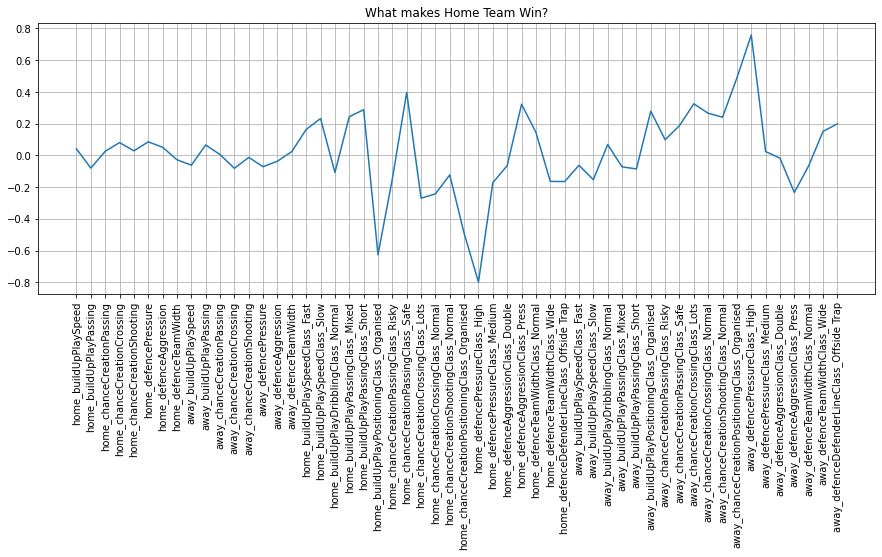

In [77]:
# Logistic Regression 모델의 coef_ 속성을 plot 하기
fig = plt.figure(figsize = (15, 5))
plt.plot(x.columns, model_lr.coef_[0])
plt.xticks(rotation = 90)
plt.title('What makes Home Team Win?')
plt.grid()
plt.show()

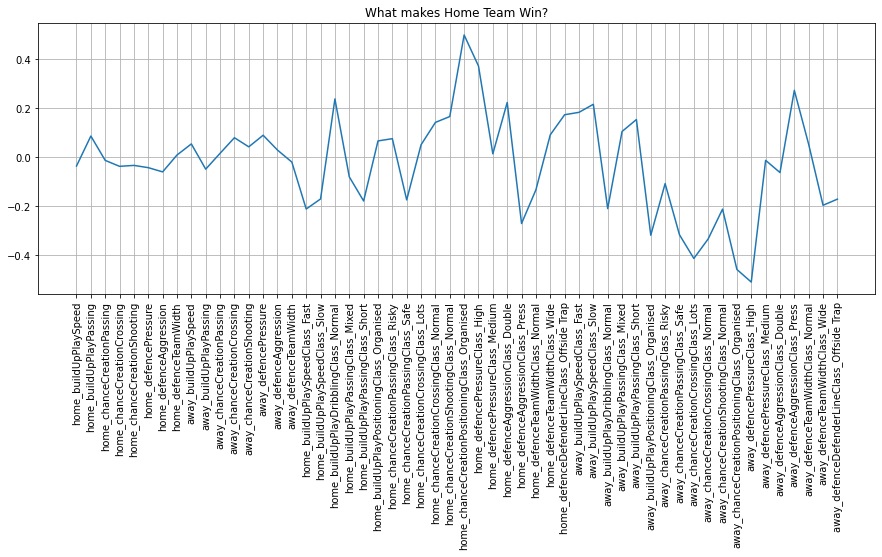

In [79]:
# Logistic Regression 모델의 coef_ 속성을 plot 하기
fig = plt.figure(figsize = (15, 5))
plt.plot(x.columns, model_lr.coef_[2])
plt.xticks(rotation = 90)
plt.title('What makes Home Team Win?')
plt.grid()
plt.show()

### 2. XGBoost 모델 확인

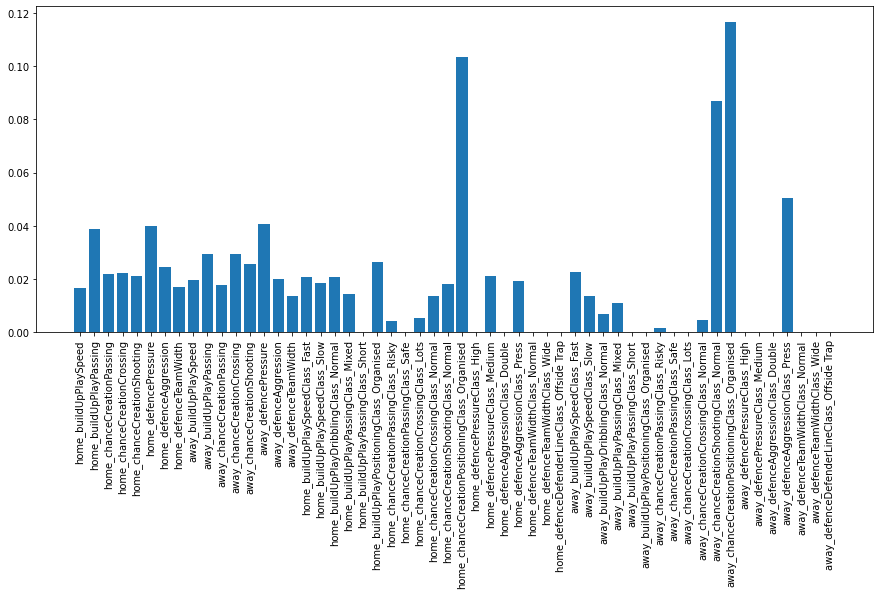

In [80]:
# XGBoost 모델의 feature_importances_ 속성을 plot 하기
fig = plt.figure(figsize = (15,6))
plt.bar(x.columns, model_xgb.feature_importances_)
plt.xticks(rotation = 90)
plt.show()

## Step6. 모델 성능 개선하기

In [81]:
## 선수 특성 중 유의미한 정보를 매치 데이터 프레임에 통합시키기
df = df_match[['home_team_goal', 'away_team_goal']].copy()

In [82]:
for team in ['home_', 'away_']:
  team_map.index.name = team + 'team_api_id'
  for col in team_map.columns:
    df[team+col] = df_match[team_map.index.name].map(team_map[col])

In [83]:
df.dropna(inplace = True)

In [84]:
df.head()

,home_team_goal,away_team_goal,home_buildUpPlaySpeed,home_buildUpPlaySpeedClass,home_buildUpPlayDribblingClass,home_buildUpPlayPassing,home_buildUpPlayPassingClass,home_buildUpPlayPositioningClass,home_chanceCreationPassing,home_chanceCreationPassingClass,home_chanceCreationCrossing,home_chanceCreationCrossingClass,home_chanceCreationShooting,home_chanceCreationShootingClass,home_chanceCreationPositioningClass,home_defencePressure,home_defencePressureClass,home_defenceAggression,home_defenceAggressionClass,home_defenceTeamWidth,home_defenceTeamWidthClass,home_defenceDefenderLineClass,away_buildUpPlaySpeed,away_buildUpPlaySpeedClass,away_buildUpPlayDribblingClass,away_buildUpPlayPassing,away_buildUpPlayPassingClass,away_buildUpPlayPositioningClass,away_chanceCreationPassing,away_chanceCreationPassingClass,away_chanceCreationCrossing,away_chanceCreationCrossingClass,away_chanceCreationShooting,away_chanceCreationShootingClass,away_chanceCreationPositioningClass,away_defencePressure,away_defencePressureClass,away_defenceAggression,away_defenceAggressionClass,away_defenceTeamWidth,away_defenceTeamWidthClass,away_defenceDefenderLineClass
0,1,1,56.333333,Balanced,Little,44.333333,Mixed,Organised,55.666667,Normal,52.333333,Normal,55.833333,Normal,Organised,49.166667,Medium,50.666667,Press,59.833333,Normal,Cover,46.000000,Balanced,Little,41.500000,Mixed,Organised,46.000000,Normal,53.500000,Normal,53.750000,Normal,Organised,48.250000,Medium,49.000000,Press,58.750000,Normal,Cover
1,0,0,55.500000,Balanced,Little,52.666667,Mixed,Organised,50.000000,Normal,49.333333,Normal,41.500000,Normal,Organised,48.666667,Medium,56.166667,Press,47.833333,Normal,Cover,64.000000,Balanced,Little,53.500000,Mixed,Organised,44.000000,Normal,47.666667,Normal,54.333333,Normal,Organised,48.833333,Medium,55.166667,Press,55.500000,Normal,Cover
2,0,3,53.666667,Balanced,Little,44.166667,Mixed,Organised,59.000000,Normal,60.333333,Normal,48.000000,Normal,Organised,60.166667,Medium,49.666667,Press,64.666667,Normal,Cover,51.333333,Balanced,Little,45.166667,Mixed,Organised,63.500000,Normal,55.000000,Normal,51.333333,Normal,Organised,59.666667,Medium,47.666667,Press,63.833333,Normal,Cover
3,5,0,54.166667,Balanced,Little,46.333333,Mixed,Organised,44.500000,Normal,64.666667,Normal,44.166667,Normal,Organised,51.333333,Medium,50.000000,Press,45.666667,Normal,Cover,51.666667,Balanced,Little,51.666667,Mixed,Organised,55.000000,Normal,60.666667,Lots,46.000000,Normal,Organised,46.000000,Medium,45.000000,Press,47.000000,Normal,Cover
5,1,1,56.666667,Balanced,Little,47.333333,Mixed,Organised,47.500000,Normal,49.833333,Normal,50.333333,Normal,Organised,47.666667,Medium,58.833333,Press,52.000000,Normal,Cover,49.166667,Balanced,Little,46.500000,Mixed,Organised,48.833333,Normal,55.833333,Normal,47.666667,Normal,Organised,53.666667,Medium,53.833333,Press,54.666667,Normal,Cover


In [88]:
## 플레이어 추가
# .count_values() -> dataframe 내에서만
# .value_counts() -> Series에서
df_player_att['player_api_id'].value_counts()
# 56~2번까지 중복돼서 나옴

210278    56
41269     56
42116     55
26472     54
179795    53
          ..
163254     2
266280     2
37366      2
238766     2
26568      2
Name: player_api_id, Length: 11060, dtype: int64

In [91]:
# player_api_id 별 overall_rating의 평균을 나타냄
player_map = df_player_att.groupby('player_api_id').mean()['overall_rating']
player_map

player_api_id
2625      60.142857
2752      69.380952
2768      69.285714
2770      71.133333
2790      70.200000
            ...    
744907    51.909091
746419    59.000000
748432    58.000000
750435    56.444444
750584    58.000000
Name: overall_rating, Length: 11060, dtype: float64

In [92]:
df_match.columns

Index(['id', 'country_id', 'league_id', 'season', 'stage', 'date',
       'match_api_id', 'home_team_api_id', 'away_team_api_id',
       'home_team_goal', 'away_team_goal', 'home_player_X1', 'home_player_X2',
       'home_player_X3', 'home_player_X4', 'home_player_X5', 'home_player_X6',
       'home_player_X7', 'home_player_X8', 'home_player_X9', 'home_player_X10',
       'home_player_X11', 'away_player_X1', 'away_player_X2', 'away_player_X3',
       'away_player_X4', 'away_player_X5', 'away_player_X6', 'away_player_X7',
       'away_player_X8', 'away_player_X9', 'away_player_X10',
       'away_player_X11', 'home_player_Y1', 'home_player_Y2', 'home_player_Y3',
       'home_player_Y4', 'home_player_Y5', 'home_player_Y6', 'home_player_Y7',
       'home_player_Y8', 'home_player_Y9', 'home_player_Y10',
       'home_player_Y11', 'away_player_Y1', 'away_player_Y2', 'away_player_Y3',
       'away_player_Y4', 'away_player_Y5', 'away_player_Y6', 'away_player_Y7',
       'away_player_Y8', 'away_

In [94]:
for col in (a+str(idx) for a in ['home_player_', 'away_player_'] for idx in range(1, 12)):
  df[col + '_rating'] = df_match[col].map(player_map)

In [97]:
# Nan값들이 보여서 nan 값을 제거하기 위해서 일단 너무 과도한건 아닌지 체크부터
df.isna().sum().max()

1452

In [98]:
df.dropna(inplace = True)

In [99]:
df.head()

,home_team_goal,away_team_goal,home_buildUpPlaySpeed,home_buildUpPlaySpeedClass,home_buildUpPlayDribblingClass,home_buildUpPlayPassing,home_buildUpPlayPassingClass,home_buildUpPlayPositioningClass,home_chanceCreationPassing,home_chanceCreationPassingClass,home_chanceCreationCrossing,home_chanceCreationCrossingClass,home_chanceCreationShooting,home_chanceCreationShootingClass,home_chanceCreationPositioningClass,home_defencePressure,home_defencePressureClass,home_defenceAggression,home_defenceAggressionClass,home_defenceTeamWidth,home_defenceTeamWidthClass,home_defenceDefenderLineClass,away_buildUpPlaySpeed,away_buildUpPlaySpeedClass,away_buildUpPlayDribblingClass,away_buildUpPlayPassing,away_buildUpPlayPassingClass,away_buildUpPlayPositioningClass,away_chanceCreationPassing,away_chanceCreationPassingClass,away_chanceCreationCrossing,away_chanceCreationCrossingClass,away_chanceCreationShooting,away_chanceCreationShootingClass,away_chanceCreationPositioningClass,away_defencePressure,away_defencePressureClass,away_defenceAggression,away_defenceAggressionClass,away_defenceTeamWidth,away_defenceTeamWidthClass,away_defenceDefenderLineClass,home_player_1_rating,home_player_2_rating,home_player_3_rating,home_player_4_rating,home_player_5_rating,home_player_6_rating,home_player_7_rating,home_player_8_rating,home_player_9_rating,home_player_10_rating,home_player_11_rating,away_player_1_rating,away_player_2_rating,away_player_3_rating,away_player_4_rating,away_player_5_rating,away_player_6_rating,away_player_7_rating,away_player_8_rating,away_player_9_rating,away_player_10_rating,away_player_11_rating
145,2,1,56.666667,Balanced,Little,47.333333,Mixed,Organised,47.5,Normal,49.833333,Normal,50.333333,Normal,Organised,47.666667,Medium,58.833333,Press,52.000000,Normal,Cover,56.333333,Balanced,Little,44.333333,Mixed,Organised,55.666667,Normal,52.333333,Normal,55.833333,Normal,Organised,49.166667,Medium,50.666667,Press,59.833333,Normal,Cover,63.214286,62.733333,70.151515,61.800000,69.192308,61.500000,63.538462,68.040000,54.600000,65.285714,62.666667,64.952381,71.388889,60.750000,66.750000,70.185185,69.333333,68.000000,65.000000,71.666667,64.611111,71.826087
153,1,3,53.666667,Balanced,Little,44.166667,Mixed,Organised,59.0,Normal,60.333333,Normal,48.000000,Normal,Organised,60.166667,Medium,49.666667,Press,64.666667,Normal,Cover,49.166667,Balanced,Little,46.500000,Mixed,Organised,48.833333,Normal,55.833333,Normal,47.666667,Normal,Organised,53.666667,Medium,53.833333,Press,54.666667,Normal,Cover,65.050000,63.142857,62.454545,63.227273,64.625000,71.800000,67.500000,66.000000,69.700000,67.129032,63.500000,71.266667,68.142857,70.375000,69.888889,70.720000,68.444444,68.541667,71.739130,71.190476,69.714286,69.130435
155,2,0,51.333333,Balanced,Little,45.166667,Mixed,Organised,63.5,Normal,55.000000,Normal,51.333333,Normal,Organised,59.666667,Medium,47.666667,Press,63.833333,Normal,Cover,55.500000,Balanced,Little,52.666667,Mixed,Organised,50.000000,Normal,49.333333,Normal,41.500000,Normal,Organised,48.666667,Medium,56.166667,Press,47.833333,Normal,Cover,67.888889,71.060606,68.958333,69.823529,72.166667,72.107143,77.972973,71.416667,79.692308,68.086957,70.896552,67.095238,67.625000,61.750000,63.722222,63.411765,64.714286,68.000000,70.521739,67.500000,65.666667,66.083333
162,2,1,56.666667,Balanced,Little,47.333333,Mixed,Organised,47.5,Normal,49.833333,Normal,50.333333,Normal,Organised,47.666667,Medium,58.833333,Press,52.000000,Normal,Cover,51.333333,Balanced,Little,45.166667,Mixed,Organised,63.500000,Normal,55.000000,Normal,51.333333,Normal,Organised,59.666667,Medium,47.666667,Press,63.833333,Normal,Cover,63.214286,62.733333,70.151515,65.285714,68.040000,69.192308,61.800000,63.538462,54.600000,67.846154,62.666667,67.888889,71.060606,72.166667,64.100000,69.407407,72.107143,69.240000,79.692308,77.972973,71.416667,70.896552
168,0,0,55.500000,Balanced,Little,52.666667,Mixed,Organised,50.0,Normal,49.333333,Normal,41.500000,Normal,Organised,48.666667,Medium,56.166

In [100]:
# 홈과 어웨이의 골 수를 승-무-패 범주로 변환하기
# (0: 홈팀, 1: 무승부, 2; 어웨이)

df['matchResult'] = df[['home_team_goal' , 'away_team_goal']].aggregate(lambda x: 0 if x[0] > x[1] else 1 if x[0] == x[1] else 2, axis = 1)

In [101]:
df.drop(['home_team_goal', 'away_team_goal'], axis = 1, inplace = True)

In [106]:
## 학습하기
X_num = df.drop(['matchResult'] + col_cats, axis = 1)
scaler = StandardScaler()
scaler.fit(X_num)
X_scaled = scaler.transform(X_num) # numpy 형태
X_scaled = pd.DataFrame(data = X_scaled, index = X_num.index, columns = X_num.columns)

X_cat = pd.get_dummies(df[col_cats], drop_first = True)
x = pd.concat([X_scaled, X_cat], axis = 1)
y = df['matchResult']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state =1)